# Understanting the data

In [2]:
from matplotlib import pyplot as plt

## 1. HuggingFace dataset

### 1.1. Generate the data

In [ ]:
from datasets.load import load_dataset as HF_load_dataset

hf_dataset = HF_load_dataset('photonsquid/coins-euro')['train']

The type of `hf_dataset` is `datasets.arrow_dataset.Dataset`.

### 1.2. Structure of the data

In [3]:
print(hf_dataset)

Dataset({
    features: ['image', 'labels'],
    num_rows: 1932
})


- `hf_dataset.features` give a dictionary of the features of the dataset:

In [4]:
hf_dataset.features

{'image': Image(decode=True, id=None),
 'labels': {'value': Value(dtype='string', id=None),
  'country': Value(dtype='string', id=None),
  'edition': Value(dtype='string', id=None),
  'variant': Value(dtype='string', id=None)}}

- `hf_dataset.num_rows` gives the number of rows in the dataset:

In [5]:
print("cols: " + str(hf_dataset.num_columns))
print("rows: " + str(hf_dataset.num_rows))

cols: 2
rows: 1932


### 1.3. Accessing the data

- I can get any element of the dataset like a list:

In [7]:
hf_dataset[4]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x150 at 0x7FDACD2CC040>,
 'labels': {'value': '10cents',
  'country': 'ad',
  'edition': 'standard',
  'variant': '4'}}

- I can iterate over the dataset:

In [8]:
for image in hf_dataset:
    print(image)
    break

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x150 at 0x7FDACD2CC340>, 'labels': {'value': '10cents', 'country': 'ad', 'edition': 'standard', 'variant': '0'}}


## 2. Tensorflow dataset

### 2.1. Generate the data

In [ ]:
import tensorflow as tf

tf_dataset = tf.data.Dataset.list_files("data/tests/train/*.png")

The type of `tf_dataset` is `tensorflow.python.data.ops.dataset_ops.ShuffleDataset`.

### 2.2. Structure of a Tensor

The structure of a Tensor is, in my case: ```tensor = tf.Tensor<content, Shape, Dtype>```.
The content needs to be converted from bytes.
For example (see Iterate over data to know why we need `as_numpy_iterator()`):

In [4]:
# get the next image
images = tf_dataset.as_numpy_iterator()
image = next(images)

# get its type
image_type = type(image)

# decode the image and get its type
image_decoded = image.decode("utf-8")
image_decoded_type = type(image_decoded)

# print out the results
print("type of the image: {}".format(image_type))
print("value of the image: {}\n".format(image))
print("type of the decode image: {}".format(image_decoded_type))
print("value of the decode image: {}".format(image_decoded))


type of the image: <class 'bytes'>
value of the image: b'data/tests/train/ad_20cents_2.png'

type of the decode image: <class 'str'>
value of the decode image: data/tests/train/ad_20cents_2.png


Another example to convert from bytes to an image:

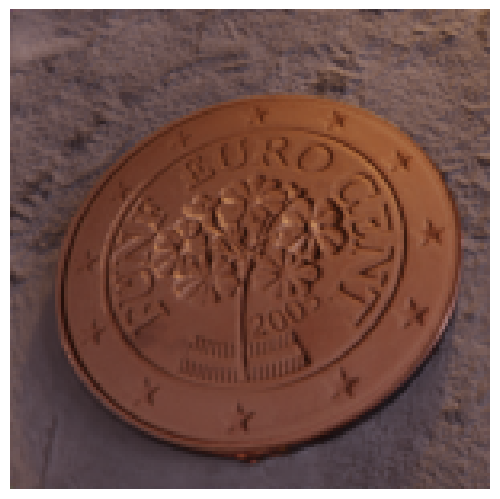

In [10]:
for image in tf_dataset:
    byte_img = tf.io.read_file(image)
    img = tf.io.decode_png(byte_img, channels=3)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    break

### 2.3 Iterate over data

It is possible to iterate over the data with a for loop:

In [12]:
for image in tf_dataset:
    print(image)
    break

tf.Tensor(b'data/tests/train/at_2cents_7.png', shape=(), dtype=string)


It is not possible to access the data like a list (`tf_dataset[4]`), but you can get the next element with `next`.

In [13]:
images = tf_dataset.as_numpy_iterator()
image = next(images)
print(image)

b'data/tests/train/ad_1cen_3.png'


I can also use `.map` to apply a function to each element of the dataset.

In the map function, you cannot get global variables.

I don't know why, but it seems that the argument (`path`) is already decoded into its real type (from `bytes` to `str`), so you don't have to do it inside the `map` function, but if you try to access to a specific element of the dataset, you have to decode it.

In [14]:
def maping_function(path):
    print('Hello there')
    path += 'I went through the map function.'
    return path

In [15]:
tf_dataset = tf_dataset.map(maping_function)

Hello there


In [16]:
count = 5
for image in tf_dataset:
    count -= 1
    print(image.numpy().decode("utf-8"))
    if count == 0:
        break

data/tests/train/at_10cents_6.pngI went through the map function.
data/tests/train/ad_2euro_0.pngI went through the map function.
data/tests/train/at_2euro_2.pngI went through the map function.
data/tests/train/ad_2cents_0.pngI went through the map function.
data/tests/train/at_2euro_4.pngI went through the map function.


Note that the `print('Hello there')` is printed only once, but you can see that the modification in the path is done for each element of the dataset. So I don't know how TensorFlow handle the printings.